In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier, Perceptron, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from tempfile import mkdtemp
from shutil import rmtree
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [ ]:
RANDOM_STATE = 42
RESULT_PATH = "/content/drive/MyDrive/Research/Colab/results"

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Research/Colab/dataset/creditcard_2023.csv', index_col=False)
df.sample(5)

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
152256,152256,-0.199273,0.169658,-0.096101,-1.299610,0.728524,0.013911,0.722787,-0.022062,0.903432,...,-0.044821,0.637773,-0.166800,0.461121,-0.297678,0.109849,0.157467,0.505097,754.01,0
413316,413316,-0.437755,1.034302,-0.960523,1.274382,0.290114,-1.540515,-0.288537,0.208688,-1.105194,...,0.164554,-0.453310,-0.452098,-0.475245,1.850587,0.945203,0.278866,0.778869,6926.49,1
558672,558672,-0.824434,0.060829,-0.646093,0.591904,-0.593841,-0.743874,-0.854357,0.417752,-1.008429,...,0.393631,0.146537,0.480658,-0.217481,0.501262,0.661284,1.772101,-0.102451,3104.77,1
209936,209936,0.328490,-0.066739,-0.119232,-1.018700,0.829860,-0.056287,0.821270,-0.114975,-0.016336,...,-0.059140,0.127536,0.050868,0.644375,-0.949059,0.910594,-0.412374,-0.215520,4415.40,0
277075,277075,1.723756,-0.221352,-0.269154,-0.043024,0.839998,-0.012553,0.668888,-0.196261,0.389668,...,-0.118936,0.033227,-0.032919,1.067999,0.664695,-1.349287,-0.229004,-0.129668,10959.58,0


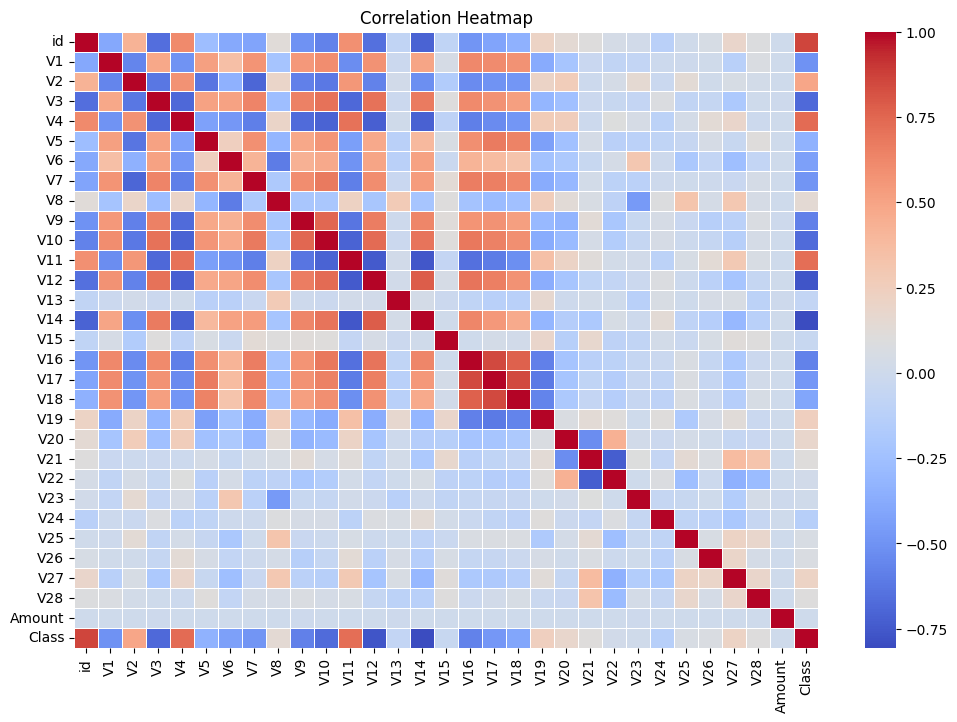

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
df.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<Axes: ylabel='count'>

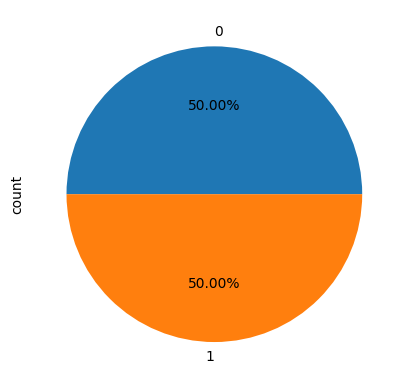

In [ ]:
df['Class'].value_counts().plot(kind='pie',autopct = '%0.2f%%')

In [ ]:
from sklearn.model_selection import train_test_split

X, y = df.drop(['id', 'Class'], axis = 1), df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import pickle
from pathlib import Path
import shutil

def save_results(dir, model, report):
  dir = Path(dir)
  if dir.exists():
    shutil.rmtree(dir)
  dir.mkdir(parents=True)
  with open(f'{dir}/pipeline.pkl', 'wb') as f:
    pickle.dump(model, f)
  with open(f"{dir}/report.txt", 'w') as f:
    f.write(report)


def train_evaluate_model(model, X_train, y_train, X_test, y_test):
  model_str = str([v for k,v in model.steps]).replace("[", "").replace("]", "")
  dir = f"{RESULT_PATH}/{model_str}"
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  report = classification_report(y_test, y_pred, digits = 4)
  print(report)
  save_results(dir, model, report)
  cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
  disp.plot()
  plt.savefig(f"{dir}/confusion_matrix.png", dpi=300)
  plt.show()
  return model

In [ ]:
def train_evaluate_model_custom_dir(model, X_train, y_train, X_test, y_test, dir):
  dir = f"{RESULT_PATH}/{dir}"
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  report = classification_report(y_test, y_pred, digits = 4)
  print(report)
  save_results(dir, model, report)
  cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
  disp.plot()
  plt.savefig(f"{dir}/confusion_matrix.png", dpi=300)
  plt.show()
  return model

In [ ]:
# def unsup_to_sup(unsup, models, X_train, new_y_train, X_test, y_test):
#   new_y_train = unsup.predict(X_train)
#   for name, model in models.items():
#     minus = (53 - len(name)) // 2
#     print(f"{'-'*minus}{name}{'-'*minus}")
#     train_evaluate_model(model, X_train, new_y_train, X_test, y_test)

In [ ]:
# def sup_to_unsup(unsup, models, X_train, new_y_train, X_test, y_test):
#   for name, model in models.items():
#     minus = (53 - len(name)) // 2
#     print(f"{'-'*minus}{name}{'-'*minus}")
#     model.fit(X_train, y_train)
#     train_evaluate_model(unsup, X_train, model.predict(X_train), X_test, y_test)

In [ ]:
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=RANDOM_STATE),
    "Logistic Regression": LogisticRegression(random_state=RANDOM_STATE),
    "Gaussian Naive Bayes": GaussianNB(),
    "Bernoulli Naive Bayes": BernoulliNB(),
    "Random Forest": RandomForestClassifier(random_state=RANDOM_STATE, n_jobs = -1),
    "Gradient Boosting": GradientBoostingClassifier(random_state=RANDOM_STATE),
    "K Nearest Neighbors": KNeighborsClassifier(n_neighbors=2),
    # "SVM": SVC(random_state = RANDOM_STATE),
}

# Preprocessing

--------------------Decision Tree--------------------
              precision    recall  f1-score   support

           0     0.9990    0.9972    0.9981     56750
           1     0.9972    0.9990    0.9981     56976

    accuracy                         0.9981    113726
   macro avg     0.9981    0.9981    0.9981    113726
weighted avg     0.9981    0.9981    0.9981    113726



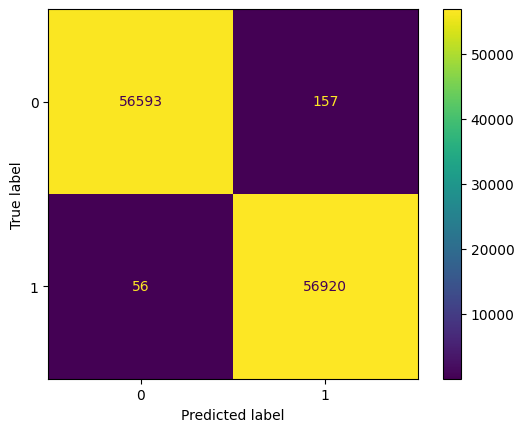

-----------------Logistic Regression-----------------
              precision    recall  f1-score   support

           0     0.9538    0.9778    0.9656     56750
           1     0.9773    0.9528    0.9649     56976

    accuracy                         0.9653    113726
   macro avg     0.9655    0.9653    0.9653    113726
weighted avg     0.9656    0.9653    0.9653    113726



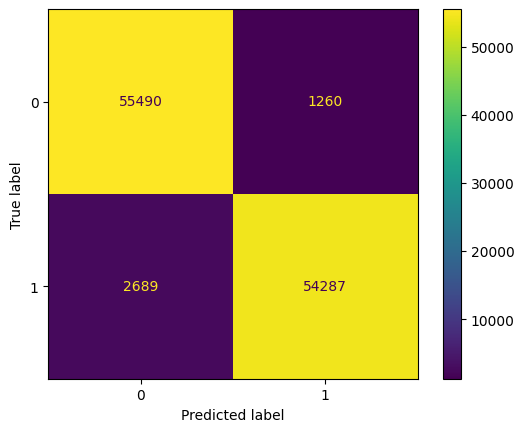

----------------Gaussian Naive Bayes----------------
              precision    recall  f1-score   support

           0     0.8729    0.9782    0.9225     56750
           1     0.9753    0.8582    0.9130     56976

    accuracy                         0.9180    113726
   macro avg     0.9241    0.9182    0.9178    113726
weighted avg     0.9242    0.9180    0.9178    113726



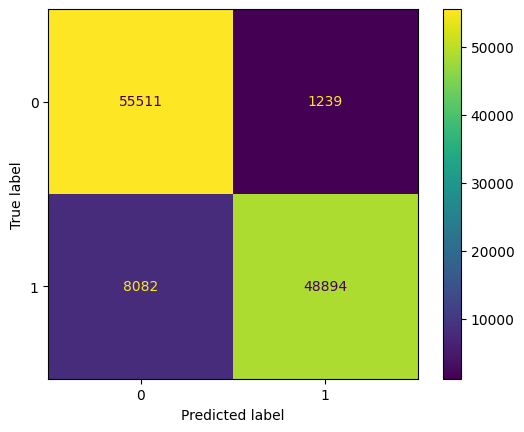

----------------Bernoulli Naive Bayes----------------
              precision    recall  f1-score   support

           0     0.8694    0.9959    0.9284     56750
           1     0.9953    0.8510    0.9175     56976

    accuracy                         0.9233    113726
   macro avg     0.9323    0.9235    0.9229    113726
weighted avg     0.9325    0.9233    0.9229    113726



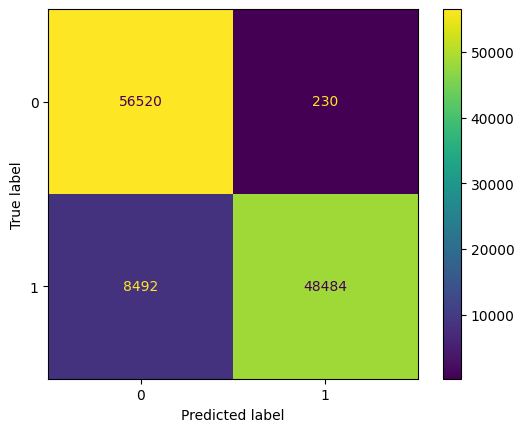

--------------------Random Forest--------------------
              precision    recall  f1-score   support

           0     1.0000    0.9998    0.9999     56750
           1     0.9998    1.0000    0.9999     56976

    accuracy                         0.9999    113726
   macro avg     0.9999    0.9999    0.9999    113726
weighted avg     0.9999    0.9999    0.9999    113726



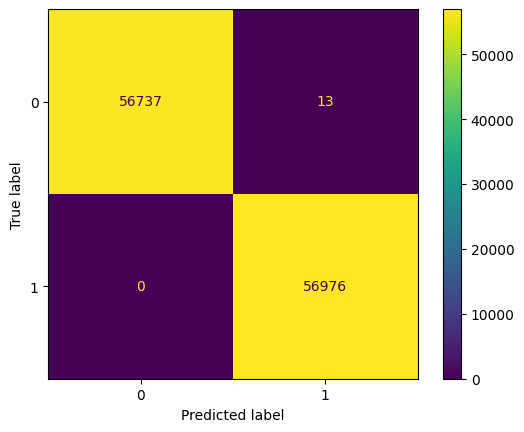

------------------Gradient Boosting------------------
              precision    recall  f1-score   support

           0     0.9694    0.9891    0.9791     56750
           1     0.9889    0.9689    0.9788     56976

    accuracy                         0.9790    113726
   macro avg     0.9792    0.9790    0.9790    113726
weighted avg     0.9792    0.9790    0.9790    113726



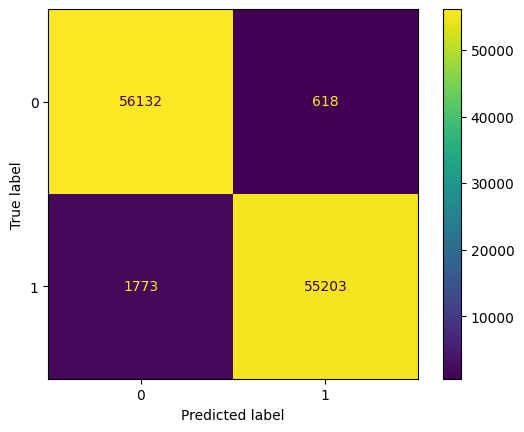

-----------------K Nearest Neighbors-----------------
              precision    recall  f1-score   support

           0     0.9998    0.9983    0.9990     56750
           1     0.9983    0.9998    0.9991     56976

    accuracy                         0.9991    113726
   macro avg     0.9991    0.9990    0.9991    113726
weighted avg     0.9991    0.9991    0.9991    113726



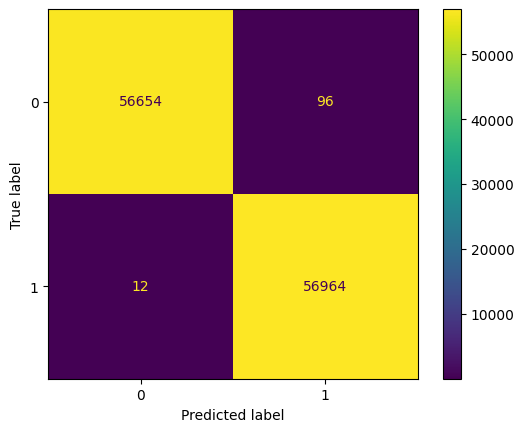

In [ ]:
from sklearn.preprocessing import StandardScaler

cachedir = mkdtemp() # caching the pipeline

for name, model in models.items():
  pipeline = make_pipeline(StandardScaler(), model, memory=cachedir)
  minus = (53 - len(name)) // 2
  print(f"{'-'*minus}{name}{'-'*minus}")
  train_evaluate_model(pipeline, X_train, y_train, X_test, y_test)

rmtree(cachedir)

--------------------Decision Tree--------------------
              precision    recall  f1-score   support

           0     0.9990    0.9974    0.9982     56750
           1     0.9975    0.9990    0.9982     56976

    accuracy                         0.9982    113726
   macro avg     0.9982    0.9982    0.9982    113726
weighted avg     0.9982    0.9982    0.9982    113726



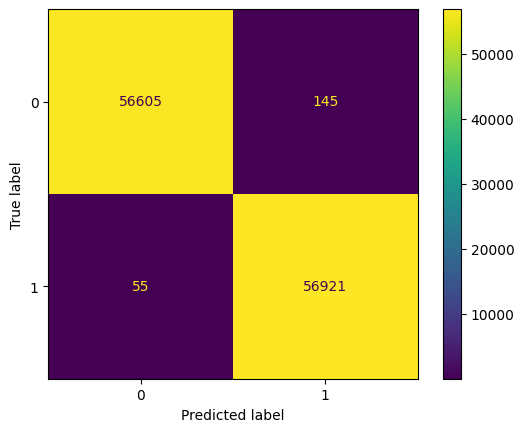

-----------------Logistic Regression-----------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0     0.9439    0.9823    0.9628     56750
           1     0.9817    0.9419    0.9614     56976

    accuracy                         0.9621    113726
   macro avg     0.9628    0.9621    0.9621    113726
weighted avg     0.9628    0.9621    0.9621    113726



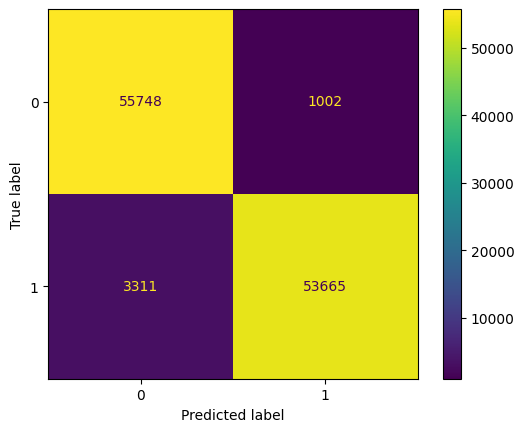

----------------Gaussian Naive Bayes----------------
              precision    recall  f1-score   support

           0     0.8729    0.9782    0.9225     56750
           1     0.9753    0.8582    0.9130     56976

    accuracy                         0.9180    113726
   macro avg     0.9241    0.9182    0.9178    113726
weighted avg     0.9242    0.9180    0.9178    113726



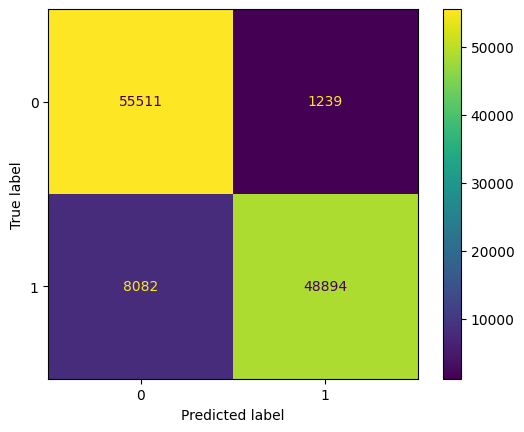

----------------Bernoulli Naive Bayes----------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0     0.4990    1.0000    0.6658     56750
           1     0.0000    0.0000    0.0000     56976

    accuracy                         0.4990    113726
   macro avg     0.2495    0.5000    0.3329    113726
weighted avg     0.2490    0.4990    0.3322    113726



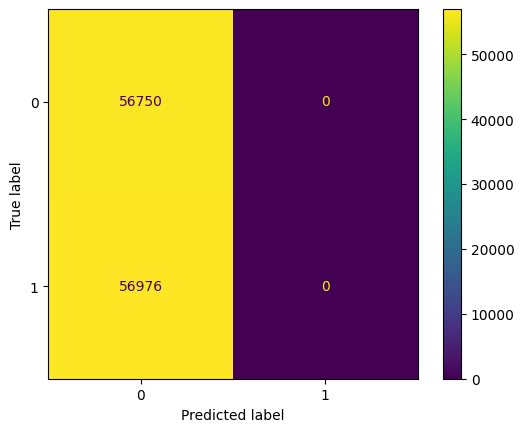

--------------------Random Forest--------------------
              precision    recall  f1-score   support

           0     1.0000    0.9998    0.9999     56750
           1     0.9998    1.0000    0.9999     56976

    accuracy                         0.9999    113726
   macro avg     0.9999    0.9999    0.9999    113726
weighted avg     0.9999    0.9999    0.9999    113726



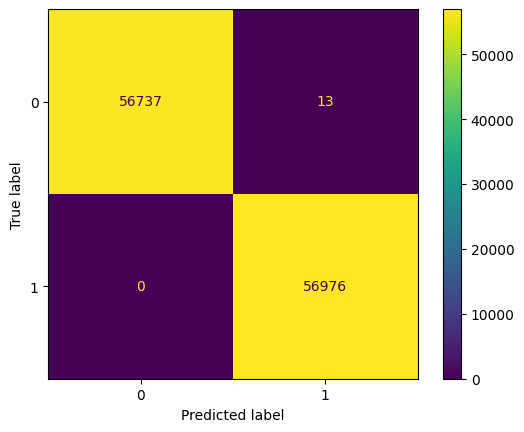

------------------Gradient Boosting------------------
              precision    recall  f1-score   support

           0     0.9701    0.9892    0.9795     56750
           1     0.9890    0.9696    0.9792     56976

    accuracy                         0.9794    113726
   macro avg     0.9795    0.9794    0.9794    113726
weighted avg     0.9796    0.9794    0.9794    113726



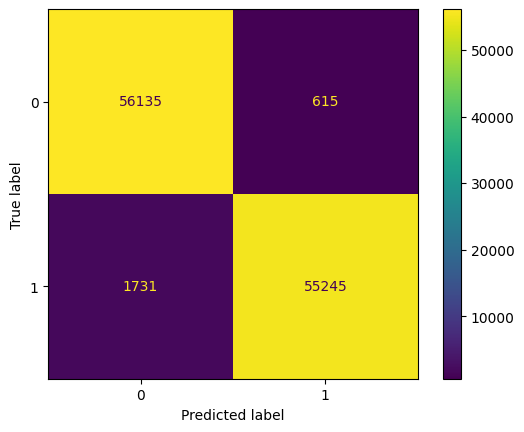

-----------------K Nearest Neighbors-----------------
              precision    recall  f1-score   support

           0     0.9996    0.9956    0.9976     56750
           1     0.9956    0.9996    0.9976     56976

    accuracy                         0.9976    113726
   macro avg     0.9976    0.9976    0.9976    113726
weighted avg     0.9976    0.9976    0.9976    113726



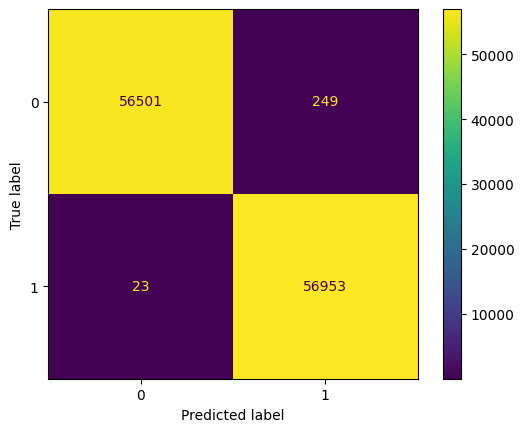

In [ ]:
from sklearn.preprocessing import MinMaxScaler

cachedir = mkdtemp() # caching the pipeline

for name, model in models.items():
  pipeline = make_pipeline(MinMaxScaler(), model, memory=cachedir)
  minus = (53 - len(name)) // 2
  print(f"{'-'*minus}{name}{'-'*minus}")
  train_evaluate_model(pipeline, X_train, y_train, X_test, y_test)

rmtree(cachedir)

with PCA

--------------------Decision Tree--------------------
              precision    recall  f1-score   support

           0     0.9961    0.9936    0.9948     56750
           1     0.9936    0.9961    0.9949     56976

    accuracy                         0.9949    113726
   macro avg     0.9949    0.9949    0.9949    113726
weighted avg     0.9949    0.9949    0.9949    113726



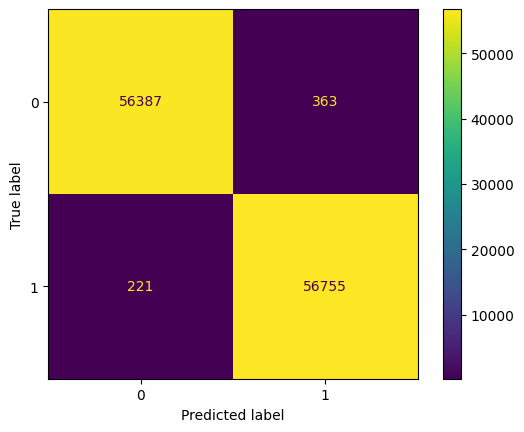

-----------------Logistic Regression-----------------
              precision    recall  f1-score   support

           0     0.9333    0.9788    0.9555     56750
           1     0.9778    0.9303    0.9535     56976

    accuracy                         0.9545    113726
   macro avg     0.9556    0.9546    0.9545    113726
weighted avg     0.9556    0.9545    0.9545    113726



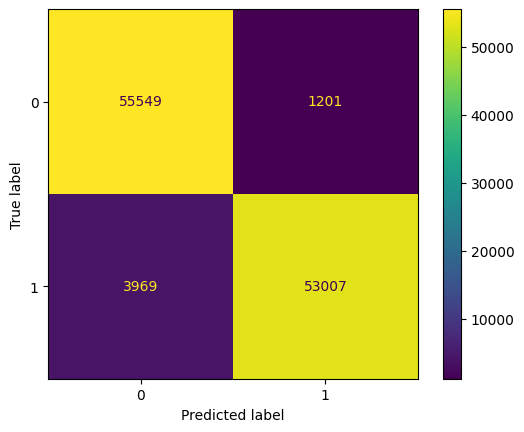

----------------Gaussian Naive Bayes----------------
              precision    recall  f1-score   support

           0     0.9047    0.9733    0.9377     56750
           1     0.9712    0.8979    0.9331     56976

    accuracy                         0.9355    113726
   macro avg     0.9380    0.9356    0.9354    113726
weighted avg     0.9380    0.9355    0.9354    113726



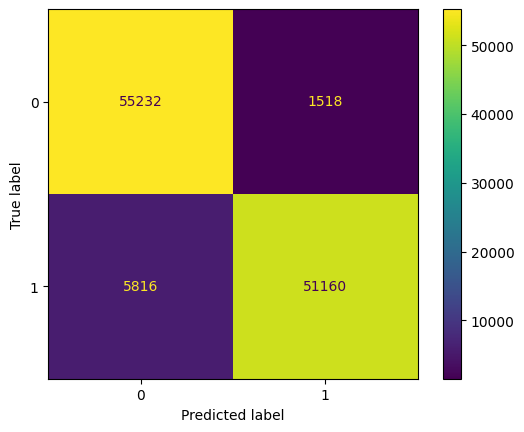

----------------Bernoulli Naive Bayes----------------
              precision    recall  f1-score   support

           0     0.8908    0.9603    0.9243     56750
           1     0.9571    0.8828    0.9185     56976

    accuracy                         0.9215    113726
   macro avg     0.9240    0.9215    0.9214    113726
weighted avg     0.9241    0.9215    0.9214    113726



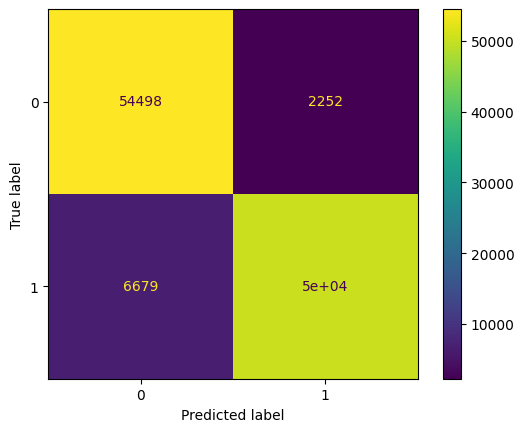

--------------------Random Forest--------------------
              precision    recall  f1-score   support

           0     0.9997    0.9990    0.9993     56750
           1     0.9990    0.9997    0.9994     56976

    accuracy                         0.9993    113726
   macro avg     0.9994    0.9993    0.9993    113726
weighted avg     0.9993    0.9993    0.9993    113726



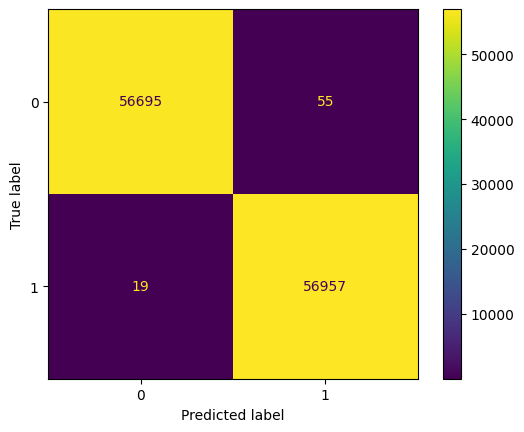

------------------Gradient Boosting------------------
              precision    recall  f1-score   support

           0     0.9480    0.9837    0.9655     56750
           1     0.9831    0.9463    0.9643     56976

    accuracy                         0.9649    113726
   macro avg     0.9656    0.9650    0.9649    113726
weighted avg     0.9656    0.9649    0.9649    113726



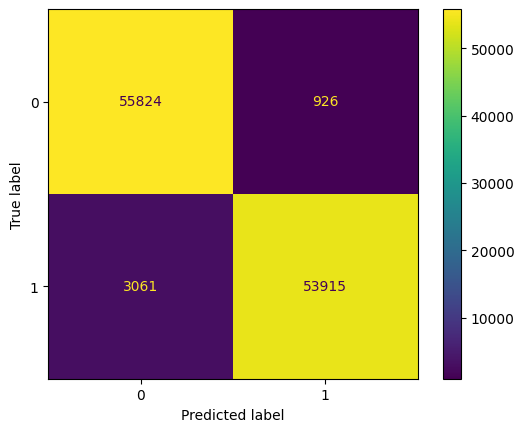

-----------------K Nearest Neighbors-----------------
              precision    recall  f1-score   support

           0     0.9996    0.9955    0.9976     56750
           1     0.9955    0.9996    0.9976     56976

    accuracy                         0.9976    113726
   macro avg     0.9976    0.9976    0.9976    113726
weighted avg     0.9976    0.9976    0.9976    113726



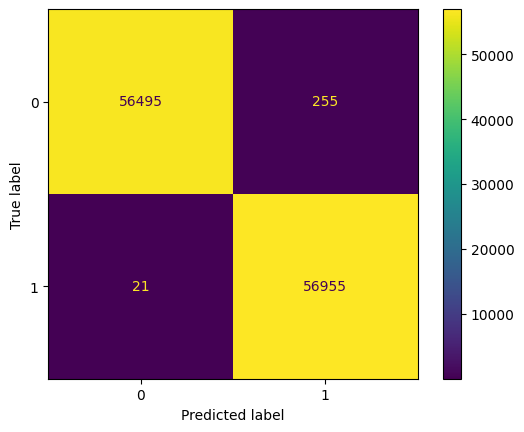

In [ ]:
from sklearn.decomposition import PCA

cachedir = mkdtemp() # caching the pipeline

for name, model in models.items():
  pipeline = make_pipeline(StandardScaler(), PCA(n_components = 12), model, memory=cachedir)
  minus = (53 - len(name)) // 2
  print(f"{'-'*minus}{name}{'-'*minus}")
  train_evaluate_model(pipeline, X_train, y_train, X_test, y_test)

rmtree(cachedir)

--------------------Decision Tree--------------------
              precision    recall  f1-score   support

           0     0.9974    0.9940    0.9957     56750
           1     0.9941    0.9974    0.9958     56976

    accuracy                         0.9957    113726
   macro avg     0.9957    0.9957    0.9957    113726
weighted avg     0.9957    0.9957    0.9957    113726



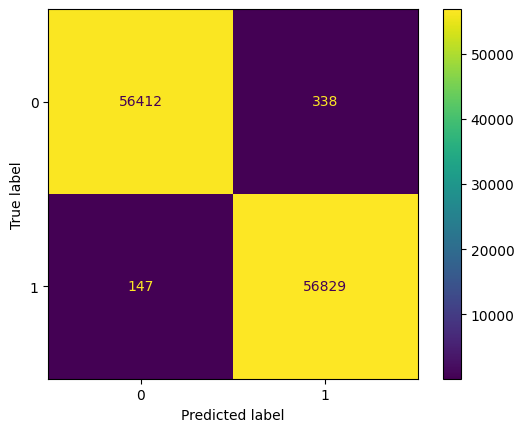

-----------------Logistic Regression-----------------
              precision    recall  f1-score   support

           0     0.9292    0.9583    0.9436     56750
           1     0.9572    0.9273    0.9420     56976

    accuracy                         0.9428    113726
   macro avg     0.9432    0.9428    0.9428    113726
weighted avg     0.9432    0.9428    0.9428    113726



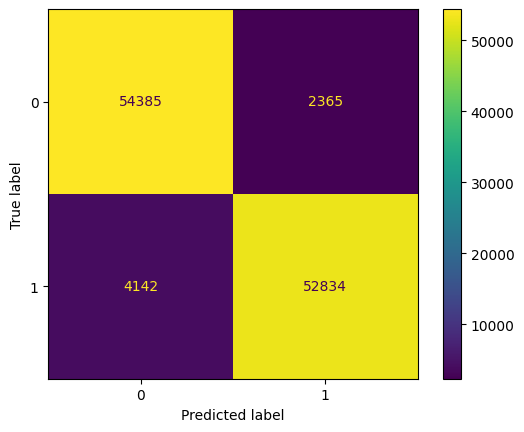

----------------Gaussian Naive Bayes----------------
              precision    recall  f1-score   support

           0     0.8898    0.9688    0.9276     56750
           1     0.9659    0.8805    0.9212     56976

    accuracy                         0.9246    113726
   macro avg     0.9279    0.9247    0.9244    113726
weighted avg     0.9279    0.9246    0.9244    113726



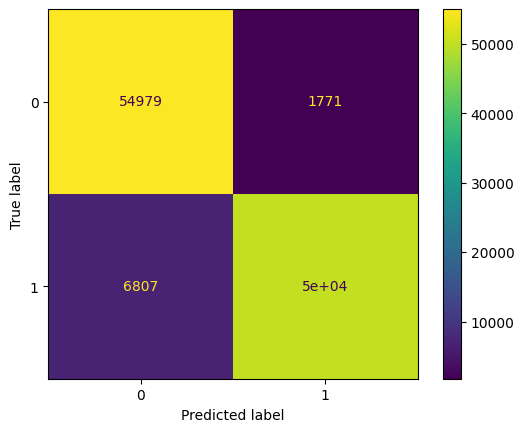

----------------Bernoulli Naive Bayes----------------
              precision    recall  f1-score   support

           0     0.8233    0.9894    0.8988     56750
           1     0.9868    0.7885    0.8766     56976

    accuracy                         0.8888    113726
   macro avg     0.9051    0.8890    0.8877    113726
weighted avg     0.9052    0.8888    0.8877    113726



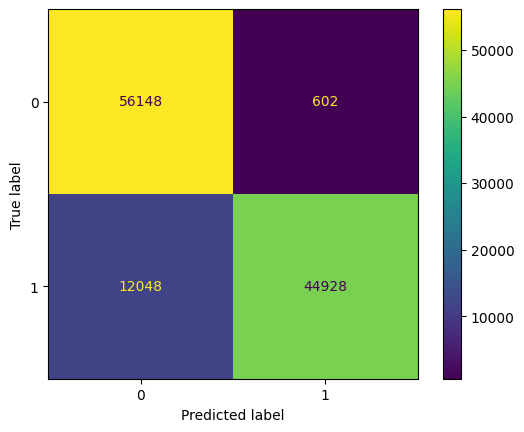

--------------------Random Forest--------------------
              precision    recall  f1-score   support

           0     1.0000    0.9995    0.9997     56750
           1     0.9995    1.0000    0.9997     56976

    accuracy                         0.9997    113726
   macro avg     0.9997    0.9997    0.9997    113726
weighted avg     0.9997    0.9997    0.9997    113726



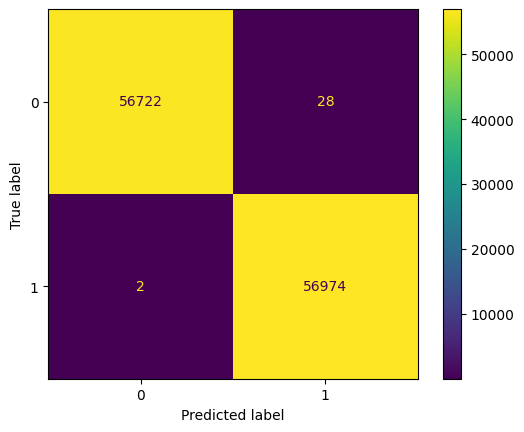

------------------Gradient Boosting------------------
              precision    recall  f1-score   support

           0     0.9436    0.9778    0.9604     56750
           1     0.9771    0.9418    0.9591     56976

    accuracy                         0.9598    113726
   macro avg     0.9603    0.9598    0.9598    113726
weighted avg     0.9604    0.9598    0.9598    113726



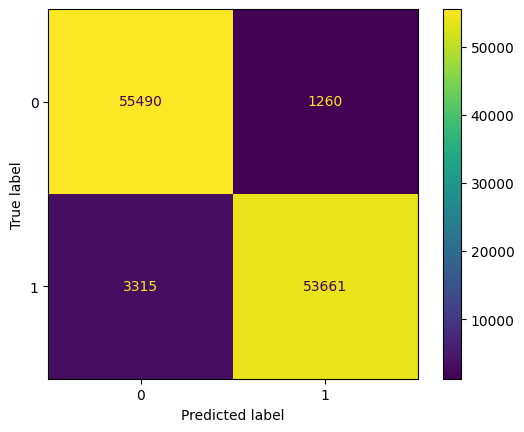

-----------------K Nearest Neighbors-----------------
              precision    recall  f1-score   support

           0     0.9988    0.9924    0.9956     56750
           1     0.9924    0.9988    0.9956     56976

    accuracy                         0.9956    113726
   macro avg     0.9956    0.9956    0.9956    113726
weighted avg     0.9956    0.9956    0.9956    113726



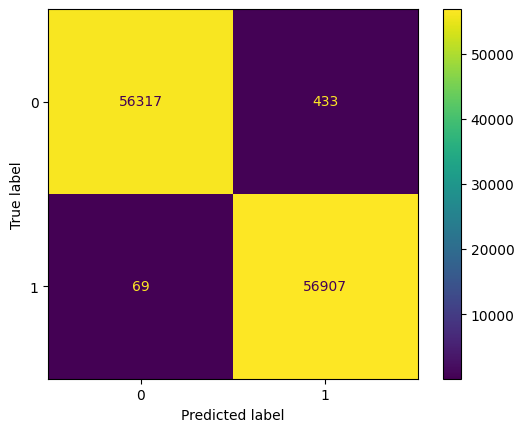

In [ ]:
from sklearn.decomposition import PCA

cachedir = mkdtemp() # caching the pipeline

for name, model in models.items():
  pipeline = make_pipeline(MinMaxScaler(), PCA(n_components = 12), model, memory=cachedir)
  minus = (53 - len(name)) // 2
  print(f"{'-'*minus}{name}{'-'*minus}")
  train_evaluate_model(pipeline, X_train, y_train, X_test, y_test)

rmtree(cachedir)

with RFE (takes too much time to train)

In [ ]:
# from sklearn.feature_selection import RFE

# cachedir = mkdtemp() # caching the pipeline

# for name, model in models.items():
#   try:
#     if name == "Random Forest": # takes too much time
#       continue
#     pipeline = make_pipeline(StandardScaler(), RFE(estimator = model), model, memory=cachedir)
#     minus = (53 - len(name)) // 2
#     print(f"{'-'*minus}{name}{'-'*minus}")
#     train_evaluate_model(pipeline, X_train, y_train, X_test, y_test)
#   except Exception as e:
#       print(f"An error occurred: {e}")
#       continue

# rmtree(cachedir)

with RFE with cross-validation

In [ ]:
# from sklearn.feature_selection import RFECV

# cachedir = mkdtemp() # caching the pipeline

# for name, model in models.items():
#   try:
#     if name == "Random Forest": # takes too much time
#       continue
#     pipeline = make_pipeline(StandardScaler(), RFECV(estimator = model), model, memory=cachedir)
#     minus = (53 - len(name)) // 2
#     print(f"{'-'*minus}{name}{'-'*minus}")
#     train_evaluate_model(pipeline, X_train, y_train, X_test, y_test)
#   except Exception as e:
#       print(f"An error occurred: {e}")
#       continue
# rmtree(cachedir)

In [ ]:
preprocess_pipeline = Pipeline([
    ('scaler', MinMaxScaler())
])

base_estimators = [
    ('rf', models["Random Forest"]),
    ('dt', models["Decision Tree"])
]
final_estimator = LogisticRegression()

stacking_clf = StackingClassifier(
    n_jobs = -1,
    verbose = 1,
    estimators=base_estimators,
    final_estimator=final_estimator
)

stacking_pipeline = Pipeline([
    ('preprocess', preprocess_pipeline),
    ('stacking', stacking_clf)
])
stacking_pipeline

Pipeline(steps=[('preprocess', Pipeline(steps=[('scaler', MinMaxScaler())])),
                ('stacking',
                 StackingClassifier(estimators=[('rf',
                                                 RandomForestClassifier(random_state=42)),
                                                ('dt',
                                                 DecisionTreeClassifier(random_state=42))],
                                    final_estimator=LogisticRegression()))])

              precision    recall  f1-score   support

           0     1.0000    0.9998    0.9999     56750
           1     0.9998    1.0000    0.9999     56976

    accuracy                         0.9999    113726
   macro avg     0.9999    0.9999    0.9999    113726
weighted avg     0.9999    0.9999    0.9999    113726



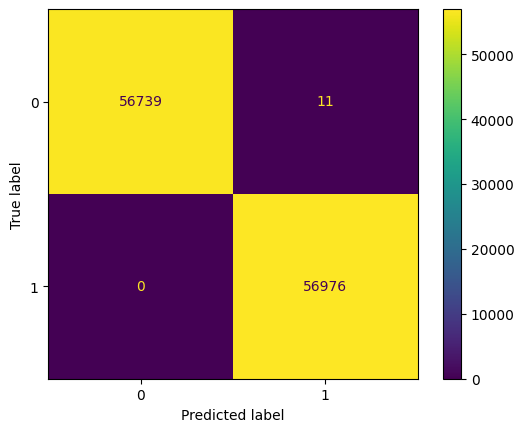

Pipeline(steps=[('preprocess', Pipeline(steps=[('scaler', MinMaxScaler())])),
                ('stacking',
                 StackingClassifier(estimators=[('rf',
                                                 RandomForestClassifier(random_state=42)),
                                                ('dt',
                                                 DecisionTreeClassifier(random_state=42))],
                                    final_estimator=LogisticRegression()))])

In [ ]:
train_evaluate_model_custom_dir(stacking_pipeline, X_train, y_train, X_test, y_test, 'stacking_rf_dt')

added k neighbors


In [ ]:
preprocess_pipeline = Pipeline([
    ('scaler', MinMaxScaler())
])

base_estimators = [
    ('rf', models["Random Forest"]),
    ('dt', models["Decision Tree"]),
    ('kn', models["K Nearest Neighbors"]),
]
final_estimator = LogisticRegression()

stacking_clf = StackingClassifier(
    n_jobs = -1,
    verbose = 1,
    estimators=base_estimators,
    final_estimator=final_estimator
)

stacking_pipeline = Pipeline([
    ('preprocess', preprocess_pipeline),
    ('stacking', stacking_clf)
])
stacking_pipeline

Pipeline(steps=[('preprocess', Pipeline(steps=[('scaler', MinMaxScaler())])),
                ('stacking',
                 StackingClassifier(estimators=[('rf',
                                                 RandomForestClassifier(random_state=42)),
                                                ('dt',
                                                 DecisionTreeClassifier(random_state=42)),
                                                ('kn',
                                                 KNeighborsClassifier(n_neighbors=2))],
                                    final_estimator=LogisticRegression()))])

              precision    recall  f1-score   support

           0     1.0000    0.9998    0.9999     56750
           1     0.9998    1.0000    0.9999     56976

    accuracy                         0.9999    113726
   macro avg     0.9999    0.9999    0.9999    113726
weighted avg     0.9999    0.9999    0.9999    113726



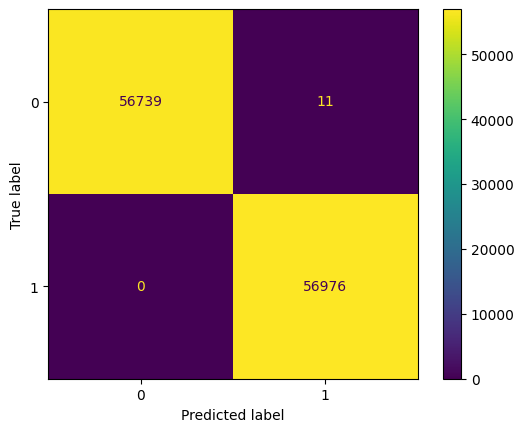

Pipeline(steps=[('preprocess', Pipeline(steps=[('scaler', MinMaxScaler())])),
                ('stacking',
                 StackingClassifier(estimators=[('rf',
                                                 RandomForestClassifier(random_state=42)),
                                                ('dt',
                                                 DecisionTreeClassifier(random_state=42)),
                                                ('kn',
                                                 KNeighborsClassifier(n_neighbors=2))],
                                    final_estimator=LogisticRegression()))])

In [ ]:
train_evaluate_model_custom_dir(stacking_pipeline, X_train, y_train, X_test, y_test, 'stacking_rf_dt_kn')

 and PCA

In [ ]:
preprocess_pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('pca', PCA(n_components=12))
])

base_estimators = [
    ('rf', models["Random Forest"]),
    ('dt', models["Decision Tree"])
]
final_estimator = LogisticRegression()

stacking_clf = StackingClassifier(
    n_jobs = -1,
    verbose = 1,
    estimators=base_estimators,
    final_estimator=final_estimator
)

stacking_pipeline = Pipeline([
    ('preprocess', preprocess_pipeline),
    ('stacking', stacking_clf)
])
stacking_pipeline

Pipeline(steps=[('preprocess',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca', PCA(n_components=12))])),
                ('stacking',
                 StackingClassifier(estimators=[('rf',
                                                 RandomForestClassifier(random_state=42)),
                                                ('dt',
                                                 DecisionTreeClassifier(random_state=42))],
                                    final_estimator=LogisticRegression()))])

              precision    recall  f1-score   support

           0     0.9999    0.9996    0.9997     56750
           1     0.9996    0.9999    0.9997     56976

    accuracy                         0.9997    113726
   macro avg     0.9997    0.9997    0.9997    113726
weighted avg     0.9997    0.9997    0.9997    113726



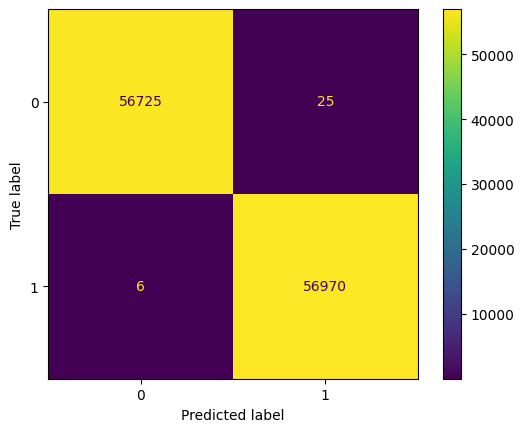

Pipeline(steps=[('preprocess',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca', PCA(n_components=12))])),
                ('stacking',
                 StackingClassifier(estimators=[('rf',
                                                 RandomForestClassifier(random_state=42)),
                                                ('dt',
                                                 DecisionTreeClassifier(random_state=42))],
                                    final_estimator=LogisticRegression()))])

In [ ]:
train_evaluate_model_custom_dir(stacking_pipeline, X_train, y_train, X_test, y_test, 'stacking_pca_rf_dt')

In [ ]:
preprocess_pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('pca', PCA(n_components=12))
])

base_estimators = [
    ('rf', models["Random Forest"]),
    ('dt', models["Decision Tree"]),
    ('kn', models["K Nearest Neighbors"]),
]
final_estimator = LogisticRegression()

stacking_clf = StackingClassifier(
    n_jobs = -1,
    verbose = 1,
    estimators=base_estimators,
    final_estimator=final_estimator
)

stacking_pipeline = Pipeline([
    ('preprocess', preprocess_pipeline),
    ('stacking', stacking_clf)
])
stacking_pipeline

Pipeline(steps=[('preprocess',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca', PCA(n_components=12))])),
                ('stacking',
                 StackingClassifier(estimators=[('rf',
                                                 RandomForestClassifier(random_state=42)),
                                                ('dt',
                                                 DecisionTreeClassifier(random_state=42)),
                                                ('kn',
                                                 KNeighborsClassifier(n_neighbors=2))],
                                    final_estimator=LogisticRegression()))])

              precision    recall  f1-score   support

           0     0.9999    0.9996    0.9997     56750
           1     0.9996    0.9999    0.9997     56976

    accuracy                         0.9997    113726
   macro avg     0.9997    0.9997    0.9997    113726
weighted avg     0.9997    0.9997    0.9997    113726



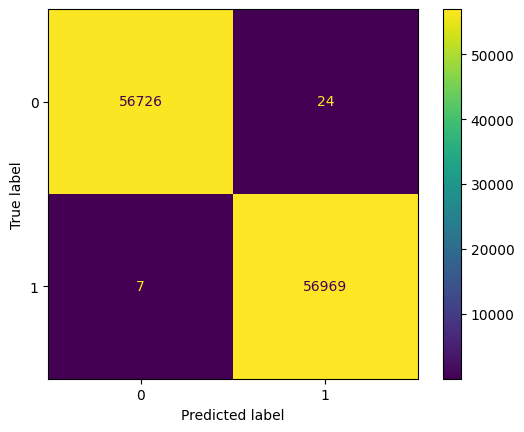

Pipeline(steps=[('preprocess',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca', PCA(n_components=12))])),
                ('stacking',
                 StackingClassifier(estimators=[('rf',
                                                 RandomForestClassifier(random_state=42)),
                                                ('dt',
                                                 DecisionTreeClassifier(random_state=42)),
                                                ('kn',
                                                 KNeighborsClassifier(n_neighbors=2))],
                                    final_estimator=LogisticRegression()))])

In [ ]:
train_evaluate_model_custom_dir(stacking_pipeline, X_train, y_train, X_test, y_test, 'stacking_pca_rf_dt_kn')